## Estimate capacities

This is difficult to do empirically, because the maximum capacity (2400 veh/lane/hr) is only acheived under pretty unstable conditions, right on the transition to gridlock. HCM has a bunch of equations for estimating this. Plot these to get some idea what we're dealing with.

In [41]:
using Revise
using Plots, KFactors, KFactors.VDF, Interpolations

In [42]:
# HCM, page 12-34, "On freeways, typical PHFs range from 0.85 to 0.98 ... higher values ... are typical of urban and suburban conditions"
# since our empirical numbers are based on 5-minute values extrapolated to the hour, we do need the PHF
PEAK_HOUR_FACTOR = 0.93

0.93

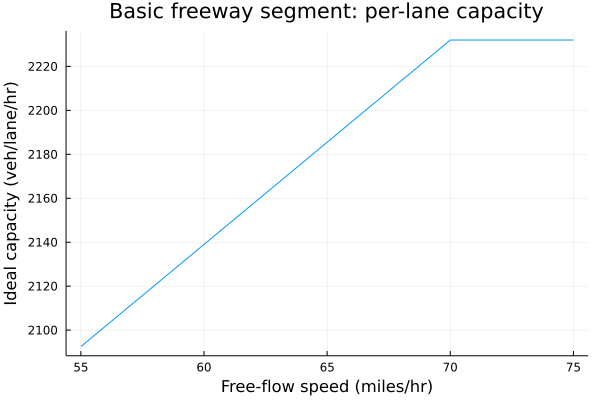

In [43]:
# Basic freeway segments
speeds = 55:1:75

plot(speeds, PEAK_HOUR_FACTOR .* VDF.basic_capacity_per_lane.(speeds), title="Basic freeway segment: per-lane capacity",
    xlabel="Free-flow speed (miles/hr)", ylabel="Ideal capacity (veh/lane/hr)", legend=false)

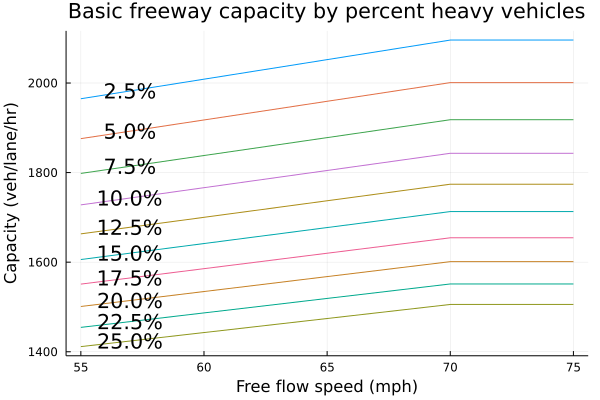

In [44]:
plot(xlabel="Free flow speed (mph)", ylabel="Capacity (veh/lane/hr)", title="Basic freeway capacity by percent heavy vehicles", legend=false)
heavy_vehicles = 2.5:2.5:25
for hv in heavy_vehicles
    plot!(speeds, PEAK_HOUR_FACTOR .* VDF.basic_capacity_per_lane.(speeds) .* VDF.heavy_vehicle_adjustment_factor(VDF.urban_truck_pce(hv / 100), hv / 100),
        series_annotations=["", "", "$(hv)%", ["" for i in 1:(length(speeds) - 3)]...])
end
plot!()

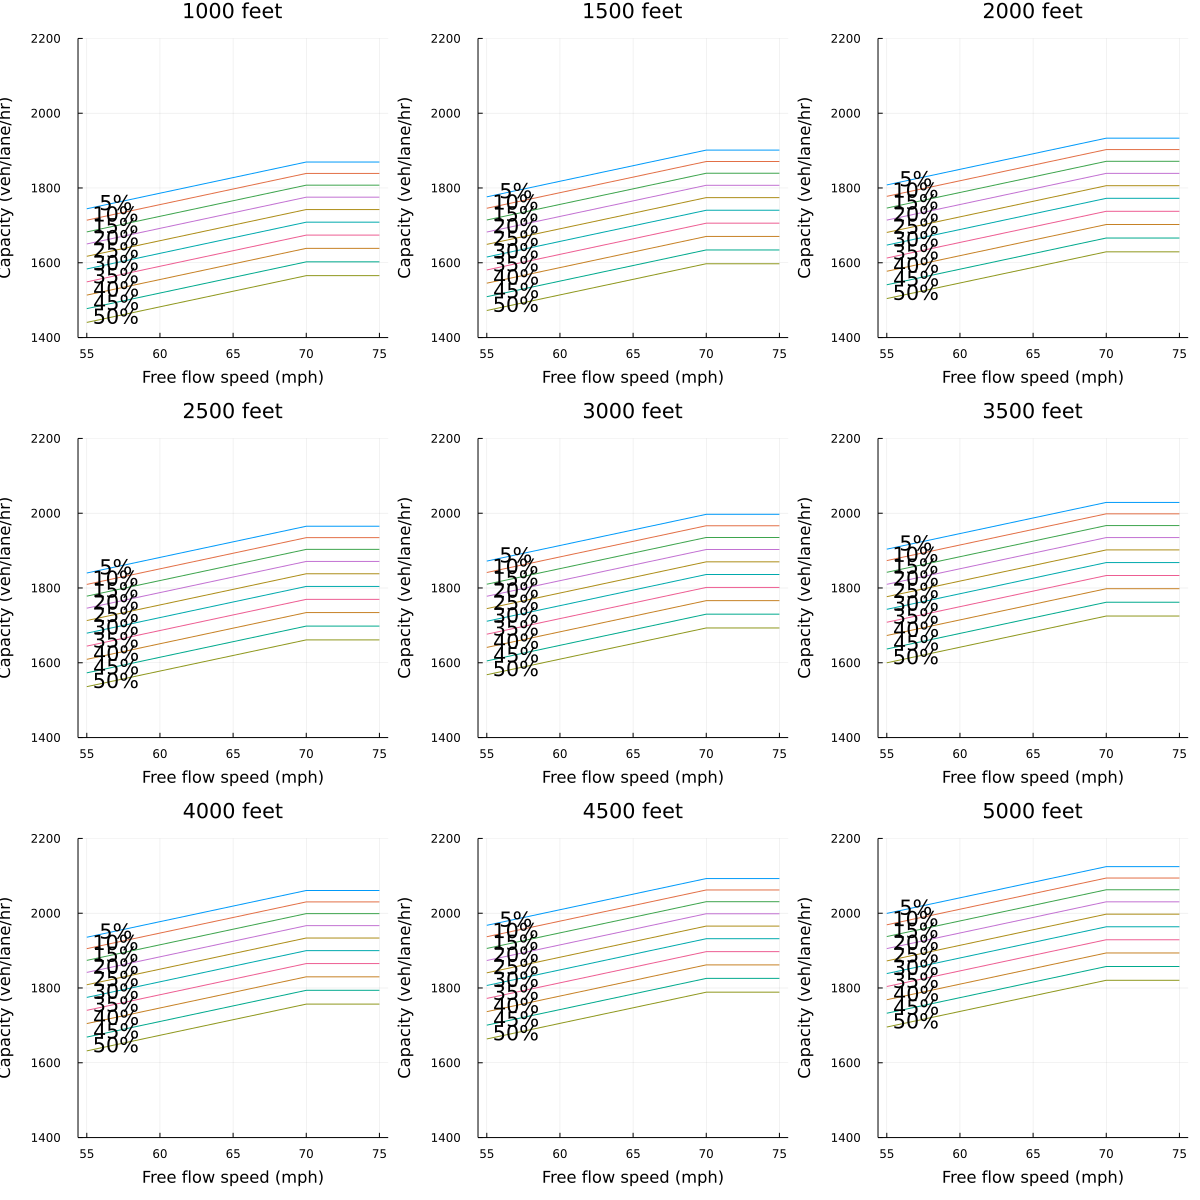

In [45]:
weave_lengths = 1000:500:5000

plots = []

phv = 0.05
hvadj = VDF.heavy_vehicle_adjustment_factor(VDF.urban_truck_pce(phv), phv)

for weave_length in weave_lengths
    p = plot(legend=false, xlabel="Free flow speed (mph)", ylabel="Capacity (veh/lane/hr)", title="$(weave_length) feet", ylim=(1400, 2200))
    for pct_weavers in 5:5:50
        ideal_cap = VDF.weaving_capacity.(VDF.basic_capacity_per_lane.(speeds), pct_weavers / 100, weave_length, 2)
        adj_cap = PEAK_HOUR_FACTOR .* hvadj .* ideal_cap
        plot!(speeds, adj_cap, series_annotations=["", "", "$(pct_weavers)%", ["" for i in 1:(length(speeds) - 3)]...])
    end
    
    push!(plots, p)
end

plot(plots..., layout=(3, 3), size=(1200, 1200))

9